In [7]:
import numpy as np
import homology as hm
from matplotlib import pyplot as plt
from sklearn import datasets
import util

# Rips algorithm

Below we show how to create a filtered simplicial complex using the rips-algorithm:

In [4]:
points, _ = datasets.make_blobs(n_samples=20, random_state=47, center_box=(-5,5), centers=7)
distance_matrix = util.create_distance_matrix(points).numpy()

rips = hm.Rips(dimensions=2)
filtered_complex, birth_labels = rips.fit(distance_matrix).transform(distance_matrix)

Now we can also use the HBDSCAN distances with rips by calling the following function:

In [5]:
hbdscan_rips = hm.HbdscanRips(max_dimensions=2, k_core=5)
filtered_complex_HBD, birth_labels_HBD = hbdscan_rips.fit(distance_matrix).transform(distance_matrix)

# Column reduction algorithm

For the sake of ease we will handcraft a relatively simple filtered simplicial complex and see how the column reduction algorithm reduces it.

In [33]:
x = np.array([
    [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
])
reduced_x = hm.reduce_columns(x)
print(reduced_x)

[[0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]


# Persitence image

Below an example of making a persistence image from a given distance matrix. And how to display it using matplotlib.

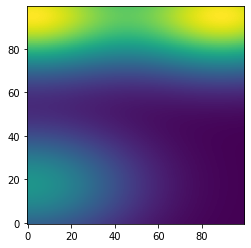

In [8]:
distance_matrix = np.array([
    [0., 5., 7., 4.],
    [5., 0., 3., 7.],
    [7., 3., 0., 11.],
    [4., 7., 11., 0.]
])
rips = hm.Rips(dimensions=2)
filtered_complexes, labels = rips.fit(distance_matrix).transform(distance_matrix)

per_img = hm.PersistenceImage(resolution=100)
pixels = per_img.fit(filtered_complexes, labels).transform(filtered_complexes, labels)

plt.imshow(pixels, origin='lower')
plt.show()
plt.close()

# Persistence Landscapes

Below an example of making a persistence landscape from a given distance matrix. And how to display it using matplotlib.

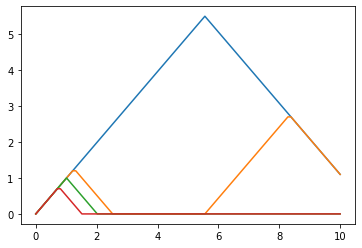

In [9]:
x = np.array([
    [0., 5., 7., 4.],
    [5., 0., 3., 7.],
    [7., 3., 0., 11.],
    [4., 7., 11., 0.]
])

rips = hm.Rips(dimensions=2)
filtered_complexes, labels = rips.fit(distance_matrix).transform(distance_matrix)

landscape = hm.PersistenceLandscape(steps=100)

(x_min, x_max), functions = landscape.fit(filtered_complexes, labels, x_min=0, x_max=10).transform(filtered_complexes, labels)

x = np.linspace(x_min, x_max, num=100)
for f in functions:
    if np.count_nonzero(f) > 0:
        plt.plot(x,f)
plt.show()